In [2]:
import tweepy as tw
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
key = 'K6gd1YLuinBhwza3hsd4J0q8x'
secret = '64CLjWg5WlAz2FobRCNDUNhwLly06DeN5reTeI7qG64xtYrbYD'
access_token = '1505776500527988738-PLscmTb4lsnPlb18B84CHemOB3xoYl'
access_token_secret = 'SU7yC9BtKgrivpoCjrmms2zYyI2NBMya02zPKbRotnZNa'

In [4]:
# Authentication
auth = tw.OAuthHandler(key,secret)
auth.set_access_token(access_token,access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [5]:
hashtag = '#competition'
query = tw.Cursor(api.search_tweets, q=hashtag).items(1000)
tweets = [{'Tweets':tweet.text, 'Timestamp':tweet.created_at} for tweet in query]
tweets

[{'Tweets': "RT @SpongeCakesLtd: Easter isn't far away and we want to celebrate by giving you the chance to win one of our Easter Chocolate Cakes! 🐰 To…",
  'Timestamp': datetime.datetime(2022, 4, 11, 16, 20, 26, tzinfo=datetime.timezone.utc)},
 {'Tweets': "RT @ProBikeUK: Do you have an @OptimateUK charger?? 🔋🤔 Did you know they do a hanging hook for it.. (See below ⬇️) \nWe've a few to giveaway…",
  'Timestamp': datetime.datetime(2022, 4, 11, 16, 20, 23, tzinfo=datetime.timezone.utc)},
 {'Tweets': 'RT @WhiteHTraining: ✨ Easter #Competition ✨\nWin this Hotel Chocolat Easter Hamper with added goodies!\n\nTo Enter:\nFollow Us\nLike and RT this…',
  'Timestamp': datetime.datetime(2022, 4, 11, 16, 20, 22, tzinfo=datetime.timezone.utc)},
 {'Tweets': "RT @gamdom: Guess the #Crypto and win $25! 🤑 \n\nWe'll select 10 correct answers randomly and award $25 to each account!\n\nRules: 👇\n\n1️⃣ Only…",
  'Timestamp': datetime.datetime(2022, 4, 11, 16, 20, 19, tzinfo=datetime.timezone.utc)},
 {'Twe

In [6]:
df = pd.DataFrame.from_dict(tweets)
df.head()

,Tweets,Timestamp
0,RT @SpongeCakesLtd: Easter isn't far away and ...,2022-04-11 16:20:26+00:00
1,RT @ProBikeUK: Do you have an @OptimateUK char...,2022-04-11 16:20:23+00:00
2,RT @WhiteHTraining: ✨ Easter #Competition ✨\nW...,2022-04-11 16:20:22+00:00
3,RT @gamdom: Guess the #Crypto and win $25! 🤑 \...,2022-04-11 16:20:19+00:00
4,RT @bmstores: 🌹#COMPETITION TIME - ENDS TUESDA...,2022-04-11 16:20:19+00:00


In [7]:
import nltk
from nltk.corpus import stopwords
from textblob import Word, TextBlob

In [8]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
stop_words = stopwords.words('english')
custom_stopwords = ['RT', '#competition']

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/satviknaik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/satviknaik/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/satviknaik/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [9]:
def preprocess_tweets(tweet, custom_stopwords):
    preprocessed_tweet = tweet
    preprocessed_tweet.replace('[^\w\s]','')
    preprocessed_tweet = " ".join(word for word in preprocessed_tweet.split() if word not in stop_words)
    preprocessed_tweet = " ".join(word for word in preprocessed_tweet.split() if word not in custom_stopwords)
    preprocessed_tweet = " ".join(Word(word).lemmatize() for word in preprocessed_tweet.split())
    return(preprocessed_tweet)

df['Preprocessed Tweet'] = df['Tweets'].apply(lambda x:preprocess_tweets(x,custom_stopwords))
df.head()

,Tweets,Timestamp,Preprocessed Tweet
0,RT @SpongeCakesLtd: Easter isn't far away and ...,2022-04-11 16:20:26+00:00,@SpongeCakesLtd: Easter far away want celebrat...
1,RT @ProBikeUK: Do you have an @OptimateUK char...,2022-04-11 16:20:23+00:00,@ProBikeUK: Do @OptimateUK charger?? 🔋🤔 Did kn...
2,RT @WhiteHTraining: ✨ Easter #Competition ✨\nW...,2022-04-11 16:20:22+00:00,@WhiteHTraining: ✨ Easter #Competition ✨ Win H...
3,RT @gamdom: Guess the #Crypto and win $25! 🤑 \...,2022-04-11 16:20:19+00:00,@gamdom: Guess #Crypto win $25! 🤑 We'll select...
4,RT @bmstores: 🌹#COMPETITION TIME - ENDS TUESDA...,2022-04-11 16:20:19+00:00,@bmstores: 🌹#COMPETITION TIME - ENDS TUESDAY🌹 ...


In [10]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df['polarity'] = df['Preprocessed Tweet'].apply(lambda x:TextBlob(x).sentiment[0])
df['subjectivity'] = df['Preprocessed Tweet'].apply(lambda x:TextBlob(x).sentiment[1])
df['sentiment'] = df['polarity'].apply(getAnalysis)
df

,Tweets,Timestamp,Preprocessed Tweet,polarity,subjectivity,sentiment
0,RT @SpongeCakesLtd: Easter isn't far away and ...,2022-04-11 16:20:26+00:00,@SpongeCakesLtd: Easter far away want celebrat...,0.5500,0.70,Positive
1,RT @ProBikeUK: Do you have an @OptimateUK char...,2022-04-11 16:20:23+00:00,@ProBikeUK: Do @OptimateUK charger?? 🔋🤔 Did kn...,0.0000,0.00,Neutral
2,RT @WhiteHTraining: ✨ Easter #Competition ✨\nW...,2022-04-11 16:20:22+00:00,@WhiteHTraining: ✨ Easter #Competition ✨ Win H...,1.0000,0.40,Positive
3,RT @gamdom: Guess the #Crypto and win $25! 🤑 \...,2022-04-11 16:20:19+00:00,@gamdom: Guess #Crypto win $25! 🤑 We'll select...,0.1875,0.45,Positive
4,RT @bmstores: 🌹#COMPETITION TIME - ENDS TUESDA...,2022-04-11 16:20:19+00:00,@bmstores: 🌹#COMPETITION TIME - ENDS TUESDAY🌹 ...,0.3750,0.75,Positive
...,...,...,...,...,...,...
995,RT @BasketsGalore: Today's Gift Basket Of The ...,2022-04-11 15:26:49+00:00,@BasketsGalore: Today's Gift Basket Of The Day...,0.0000,0.00,Neutral
996,RT @bmstores: 🌹#COMPETITION TIME - ENDS SOON🌹\...,2022-04-11 15:26:43+00:00,@bmstores: 🌹#COMPETITION TIME - ENDS SOON🌹 We'...,0.3750,0.75,Positive
997,RT @BasketsGalore: Today's Gift Basket Of The ...,2022-04-11 15:26:37+00:00,@BasketsGalore: Today's Gift Basket Of The Day...,0.0000,0.00,Neutral
998,RT @bmstores: 🌹#COMPETITION TIME - ENDS TUESDA...,2022-04-11 15:26:35+00:00,@bmstores: 🌹#COMPETITION TIME - ENDS TUESDAY🌹 ...,0.3750,0.75,Positive


In [11]:
x = df['sentiment'].value_counts(0)
print(x)
x = list(x)
x

Positive    840
Neutral     135
Negative     25
Name: sentiment, dtype: int64


[840, 135, 25]

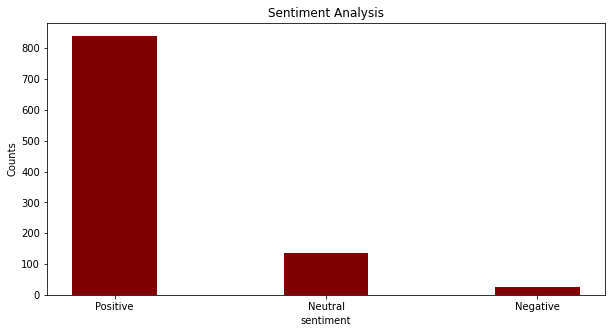

In [13]:
courses = ['Positive','Neutral','Negative']
values = x
fig = plt.figure(figsize = (10, 5))
plt.bar(courses, values, color ='maroon',width = 0.4)
plt.xlabel("sentiment")
plt.ylabel("Counts")
plt.title("Sentiment Analysis")
plt.show()

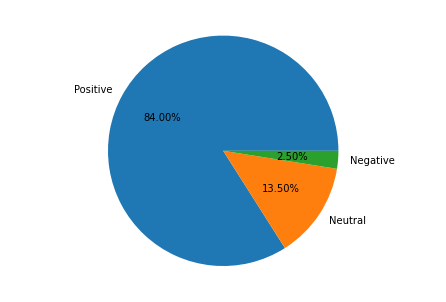

In [19]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
sentiment = ['Positive','Neutral','Negative']
counts = x
ax.pie(counts, labels = sentiment,autopct='%1.2f%%')
plt.show()